In [2]:
import cv2

img = cv2.imread('data/test/R.jpg')
h,w=img.shape[:2]
resized_img = cv2.resize(img, (640, 640))
cv2.imwrite('data/test/640.jpg', resized_img)

# print(img.shape)

(478, 850, 3)


In [3]:
%cd ~/autodl-tmp/mmyolo

/root/autodl-tmp/mmyolo


In [5]:
# 可视化backbone并且输出三个通道（这里总共就三个）
!python demo/featmap_vis_demo.py \
      ~/autodl-tmp/mmdetection/data/test/640.jpg \
      ~/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/balloon_rtmdet.py \
      ~/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/best_coco/bbox_mAP_epoch_170.pth  \
      --target-layers backbone  \
      --channel-reduction squeeze_mean

Loads checkpoint by local backend from path: /root/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/best_coco/bbox_mAP_epoch_170.pth
06/10 19:07:04 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/10 19:07:04 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/10 19:07:09 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/lib/python3.8/site-packages/mmengine/visualizati

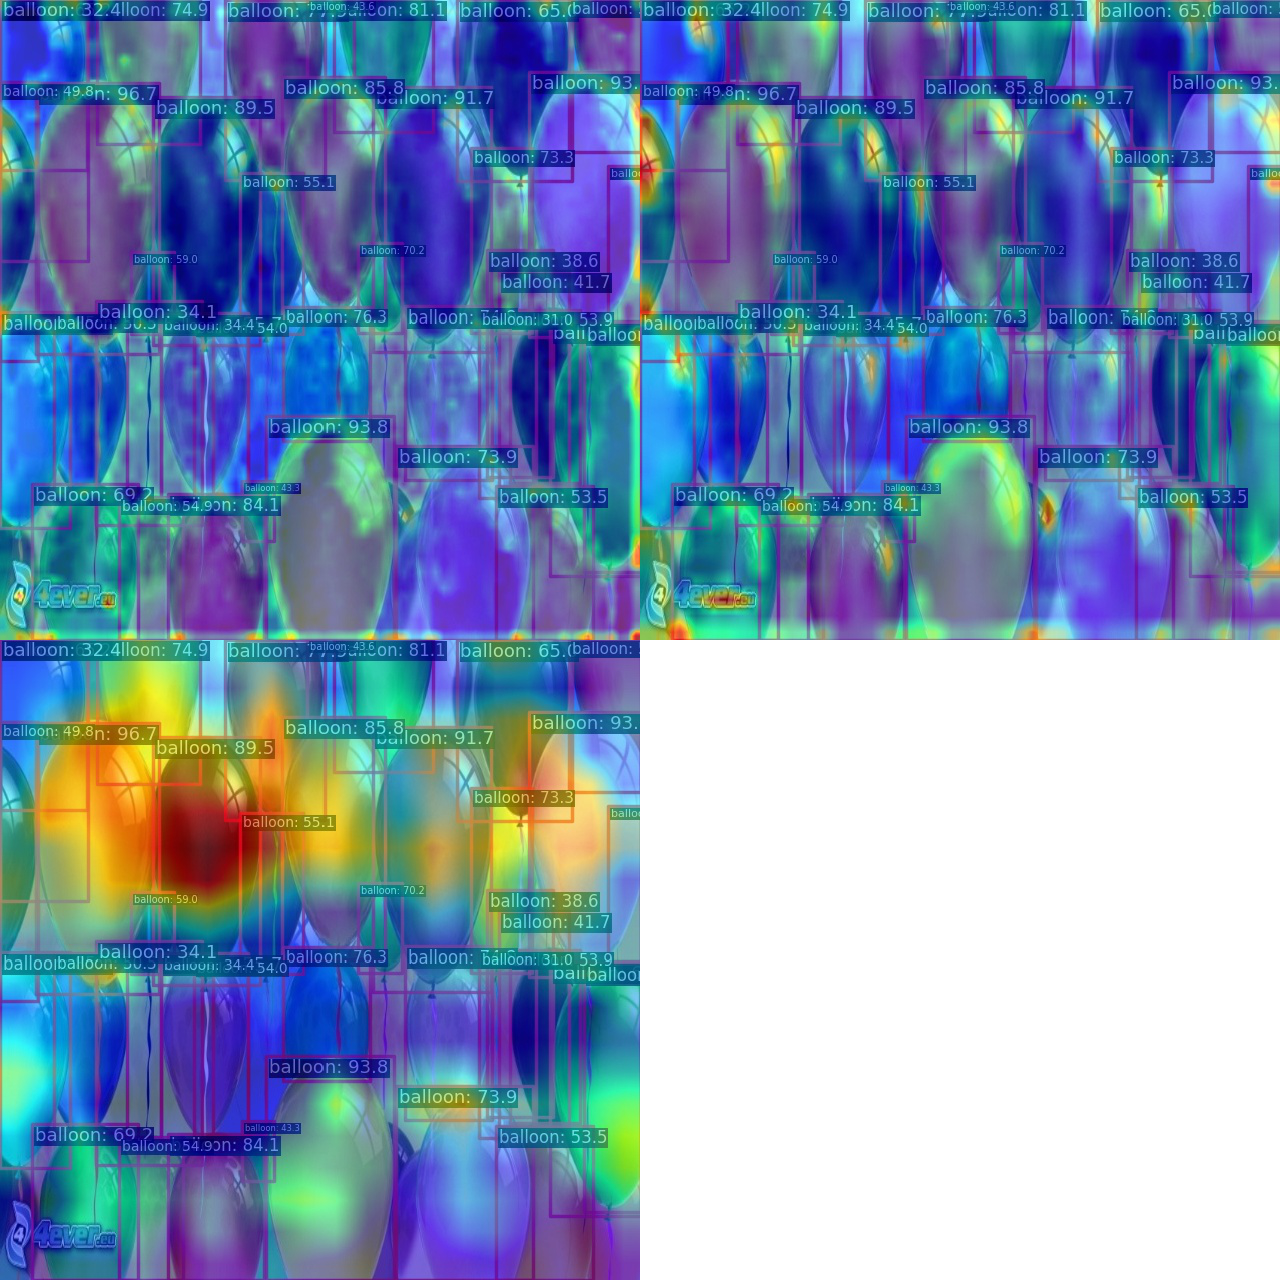

In [6]:
from PIL import Image
Image.open('output/640.jpg') 

In [9]:
# 可视化neck并且输出三个通道（这里总共就三个）
!python demo/featmap_vis_demo.py \
      ~/autodl-tmp/mmdetection/data/test/640.jpg \
      ~/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/balloon_rtmdet.py \
      ~/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/best_coco/bbox_mAP_epoch_170.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean \
      --out-dir ./output_neck 

Loads checkpoint by local backend from path: /root/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/best_coco/bbox_mAP_epoch_170.pth
06/10 19:12:28 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/10 19:12:28 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/10 19:12:33 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/lib/python3.8/site-packages/mmengine/visualizati

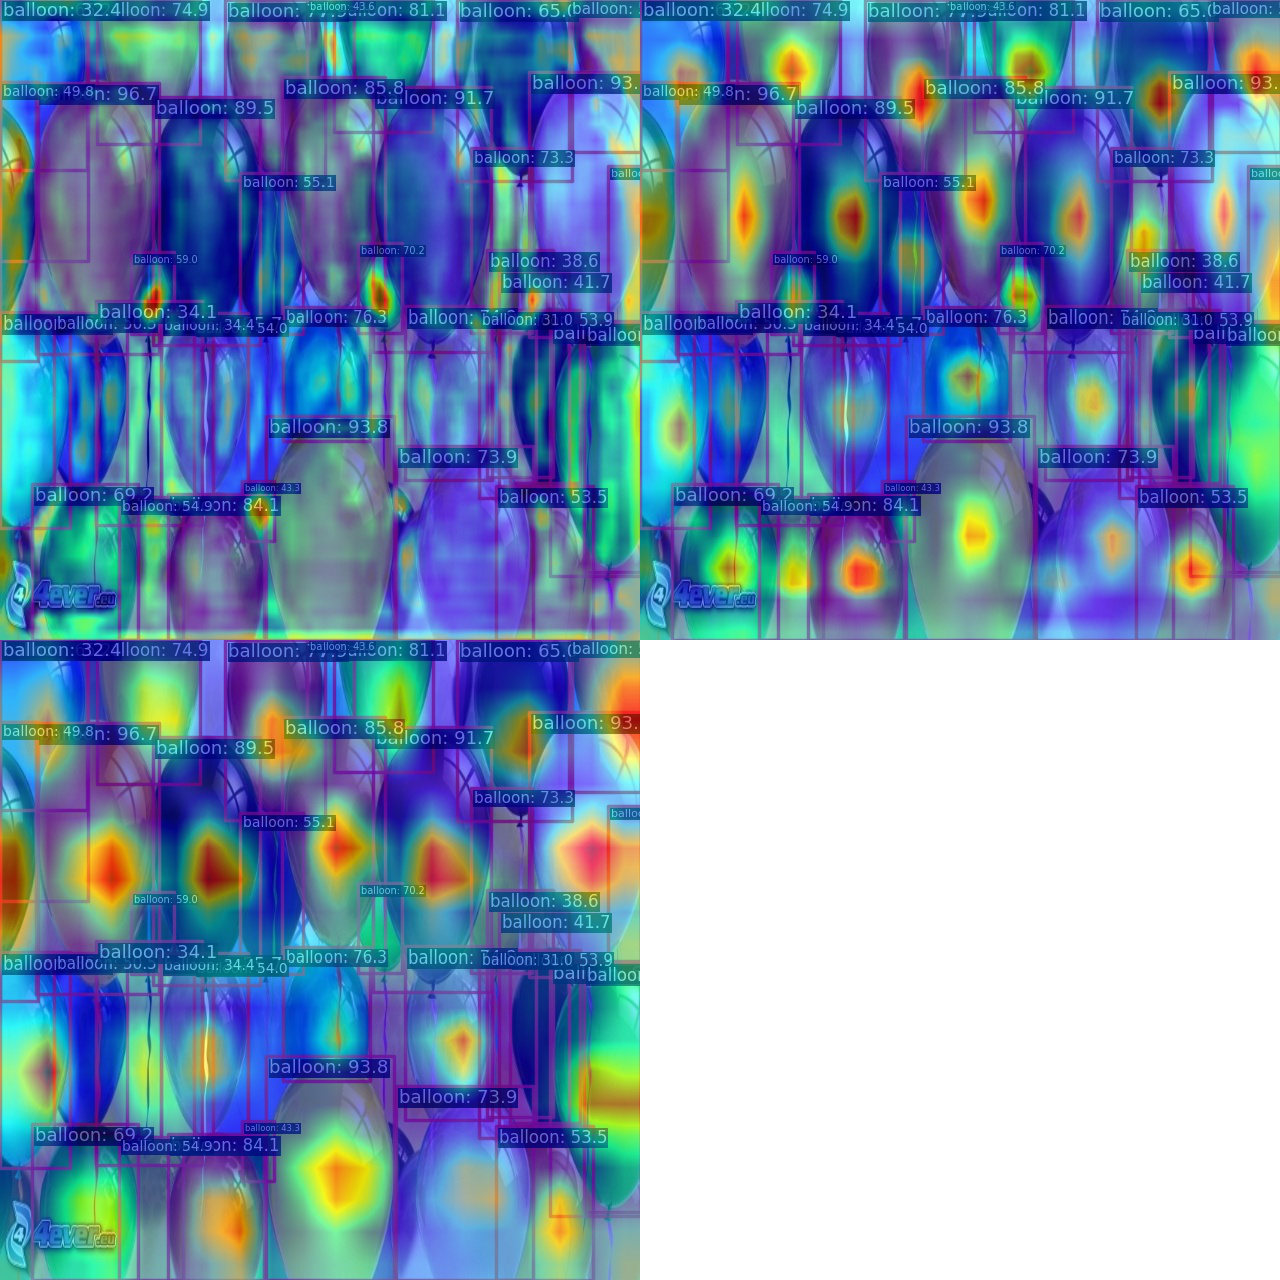

In [10]:
Image.open('output_neck/640.jpg') 

In [12]:
# grad_based cam 可视化
# 需要下载额外的库
!pip install "grad-cam"

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 7.8 MB 5.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.8 MB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 36.5 MB/s eta 0:00:01
  Created wheel for grad-cam: filename=grad_cam-1.4.3-py3-none-any.whl size=32243 sha256=3b7725e59879f86609d6f78ccf2f83d26e3aa9e16362fa913b9b9c5d8e9a8793
  Stored in directory: /root/.cache/pip/wheels/27/c4/a3/f620eedbf878bee53a7d4c2d543625bf3707c4e1a1446dfdb8
Successfully built grad-cam


In [16]:
# 查看neck输出的最小特征图的grad cam（因为这里neck是三层，最小特征图是经过三层提取后的那张，所以是【2】）
!python demo/boxam_vis_demo.py \
      ~/autodl-tmp/mmdetection/data/test/640.jpg \
      ~/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/balloon_rtmdet.py \
      ~/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/best_coco/bbox_mAP_epoch_170.pth  \
      --target-layer neck.out_convs[2] \
      --out-dir ./output_cam_neck_2

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: /root/autodl-tmp/mmdetection/work_dirs/balloon_rtmdet/best_coco/bbox_mAP_epoch_170.pth
[                                                  ] 0/1, elapsed: 0s, ETA:Traceback (most recent call last):
  File "demo/boxam_vis_demo.py", line 276, in <module>
    main()
  File "demo/boxam_vis_demo.py", line 212, in main
    result = model_wrapper()[0]
  File "/root/autodl-tmp/mmyolo/mmyolo/utils/boxam_utils.py", line 222, in __call__
    self.detector.bbox_head.head_module.training = False
  File "/root/miniconda3/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1177, in __getattr__
    raise AttributeError("'{}' object has no attribute '{}'".format(
AttributeError: 'RTMDetSepBNHead' object has no attribute 'head_module'
